<a href="https://colab.research.google.com/github/Souptik-De/OCR_SD/blob/main/OCR_tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python torch==2.6.0 transformers==4.46.3 tokenizers==0.20.3 einops addict easydict
! pip install flash-attn==2.7.3 --no-build-isolation



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 132.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB

In [ ]:
from google.colab import files
uploaded = files.upload()


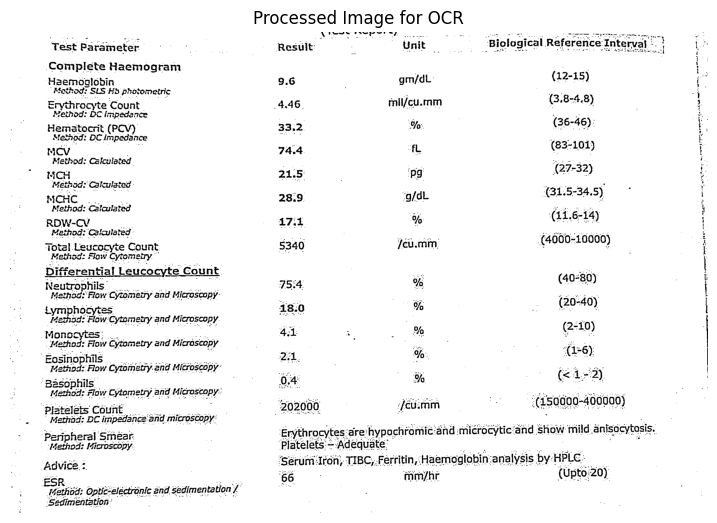

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 4.62
Script: Latin
Script confidence: 3.50



In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# change filename if needed
image_path = "croped_test_1.jpg"

# Load + preprocess
img = cv2.imread(image_path)
scale = 1.8
img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Light contrast boost
gray = cv2.convertScaleAbs(gray, alpha=0.84, beta=-50)

# _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, blockSize=13, C=6)

# Show processed image
plt.figure(figsize=(9,7.5))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title("Processed Image for OCR")
plt.show()
osd = pytesseract.image_to_osd(thresh)
print(osd)


In [ ]:
custom_config = r'--oem 3 --psm 11'
text = pytesseract.image_to_string(thresh, config=custom_config)
print("===== RAW OCR TEXT =====")
print(text)


===== RAW OCR TEXT =====
bet Ree

Test Parameter

Result

Unit

Biological Reference Interval

Complete Haemogram

Haemoglobin

9.6

gm/di

(12-15)

Mathod: SLS HS photometric

(3.8-4.8)

Erythrocyte Count

4.46

tmil/cusmm

Method: DC impedance

Hematocrit (Pi

33.2

%

(36-46)

Method: BC impadance

fl

(83-104)

hi

74.4

tethod:; Calculated

NCH

21.5

Pg

(27-32)

Method: Calculated

28.9

g/d

(31:5-34.5)

MCHC

Method: Calculated

(11.6-14)

RDW-CV

417.1

%

Method: Catailated

5340

/cu.mm

(4000-10000)

Total Leucocyte Count

Method: Flow Cytomeiry

Dit fferential Leucocyte Count Count

75:4.

%,

(40280)

Neutrophils”

Methog? Flove Cytomerry and Microscopy

(20-40)

ymphocytes.

18.0

%

‘Yinba: Flow Cytometry and Microscopy

4.1

%

(2-10)

Monocytes

fethog: Fioiv is Cjtometry and Microscopy

(1-6)

Eosinophils

2:1

%

Mathiod: Flow Cytometry. and Microscopy

0.4

%.

(< 1-°2)

Basophils

Mead: Flows Cytometry and Microscopy

Platelets Count

202000

/cu.mm

(150090-4000

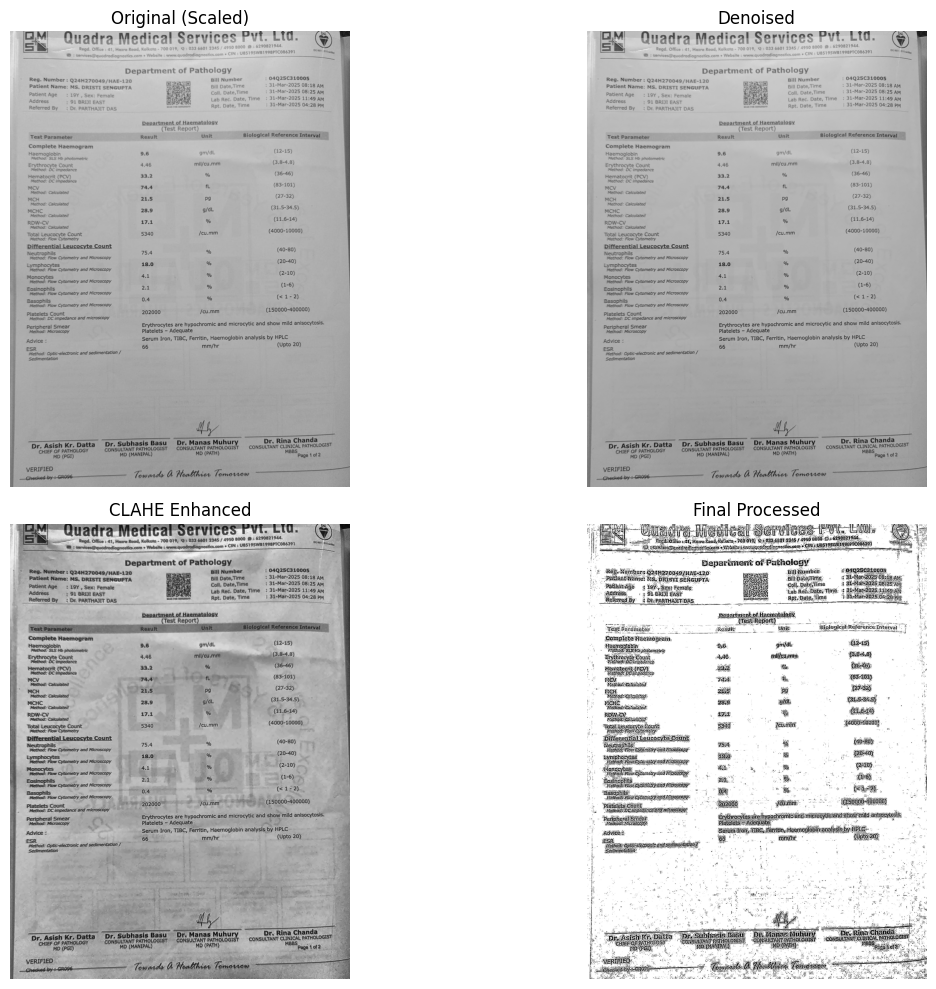

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 3.16
Script: Latin
Script confidence: 5.78



In [ ]:
from pickle import encode_long
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

# Load image
image_path = "/content/b2d2e730-ea09-4a8e-938b-f03959d2f79b.jpg_processed.jpg"
# image_path = "/content/croped_test_1.jpg"
img = cv2.imread(image_path)

# Scale up for better OCR
scale = 2.5
img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# gaussian = cv2.GaussianBlur(gray, (0, 0), 2.0)
# sharpened = cv2.addWeighted(gray, 1.8, gaussian, -0.5, 0)

laplacian = cv2.Laplacian(gray, cv2.CV_64F)
sharpened = np.uint8(np.clip(gray - 0.3 * laplacian, 0, 255))
# Denoise while preserving edges
denoised = cv2.fastNlMeansDenoising(sharpened, None, h=2, templateWindowSize=7, searchWindowSize=21)

# Enhance contrast using CLAHE (better than convertScaleAbs for documents)
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
enhanced = clahe.apply(denoised)


# Apply adaptive threshold with optimized parameters
thresh = cv2.adaptiveThreshold(
    enhanced, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=13,
    C= 6
)

# Optional: Morphological operations to clean up noise
# kernel = np.ones((1,1), np.uint8)
# cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(14,10))

axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original (Scaled)")
axes[0, 0].axis('off')

axes[0, 1].imshow(denoised, cmap='gray')
axes[0, 1].set_title("Denoised")
axes[0, 1].axis('off')

axes[1, 0].imshow(enhanced, cmap='gray')
axes[1, 0].set_title("CLAHE Enhanced")
axes[1, 0].axis('off')

axes[1, 1].imshow(thresh, cmap='gray')
axes[1, 1].set_title("Final Processed")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

osd = pytesseract.image_to_osd(thresh)
print(osd)


In [ ]:
# Perform OCR with custom config for better table recognition
custom_config = r'--oem 3 --psm 11'  # PSM 6 = Assume uniform block of text
text = pytesseract.image_to_string(thresh, config=custom_config)

print("=" * 50)
print("EXTRACTED TEXT:")
print("=" * 50)
print(text)

# Optional: Get detailed data with confidence scores
# data = pytesseract.image_to_data(cleaned, output_type=pytesseract.Output.DICT, config=custom_config)

# Filter high-confidence text
# print("\n" + "=" * 50)
# print("HIGH CONFIDENCE EXTRACTIONS (>60%):")
# print("=" * 50)
# for i, conf in enumerate(data['conf']):
#     if int(conf) > 60:
#         text_val = data['text'][i]
#         if text_val.strip():
#             print(f"{text_val} (confidence: {conf}%)")

EXTRACTED TEXT:
ee he

a5 ea

me

ESL ee ee eg

name beeen

TORS sti a

in,

‘BiologicalRe Reference’ Interval

we ee

eter |

i}

oer?

iil:

_. —.

NE ps

vy

Complet Reemegran

gm/dl:

(42-45)

Be

—

on

kotomsive

==.

(384.8)

AAG

vrili/eusrenit,

ote:

fe]

peuEree.

33

Gos

(36-4

ReRStec#it

ence

Wl

Dad

ils

\(@3-168)

%

Metibys Cs tiiistey

a

@

5)

MEH,

DE

BS

ee eslalear

=

ICH

4

28.

ak:

(Bis5234.

“PEB}

oi: Salaileted:

14)

ROW.

ay

%

bi)

Heth

CUES

=

Fats

5340

ast

Jean

‘@

ee

HE

See

eae

anos Pay

Digensntal Leuce

> Gounic.

a

———

eee.

Wi

LAN

&

gy -

Bi

N

tS

%,

#10

uniediy Se Uilerasee

copy

G

aval

ail

Ys

¢

is

Steet to

ek reas

li

2Dg:

ee

OU

ey end Micsaupy-

cae

Mors

By

6

(2:

pa Paonia:

ane Mieascopy

a

SeeNe

6);

oh

i

us

ne

Ded. ~

Of:

Es

vie ane.

Micast

0 Ere

BY

Tins

a

ot

6

To

wy

3

ita

id: Mdlerestony

Sse

Spoateen’

AFG) SSeS

20

000.

ie feu im

Ae

cian

See eas Saray

5

al

erostOY:

f

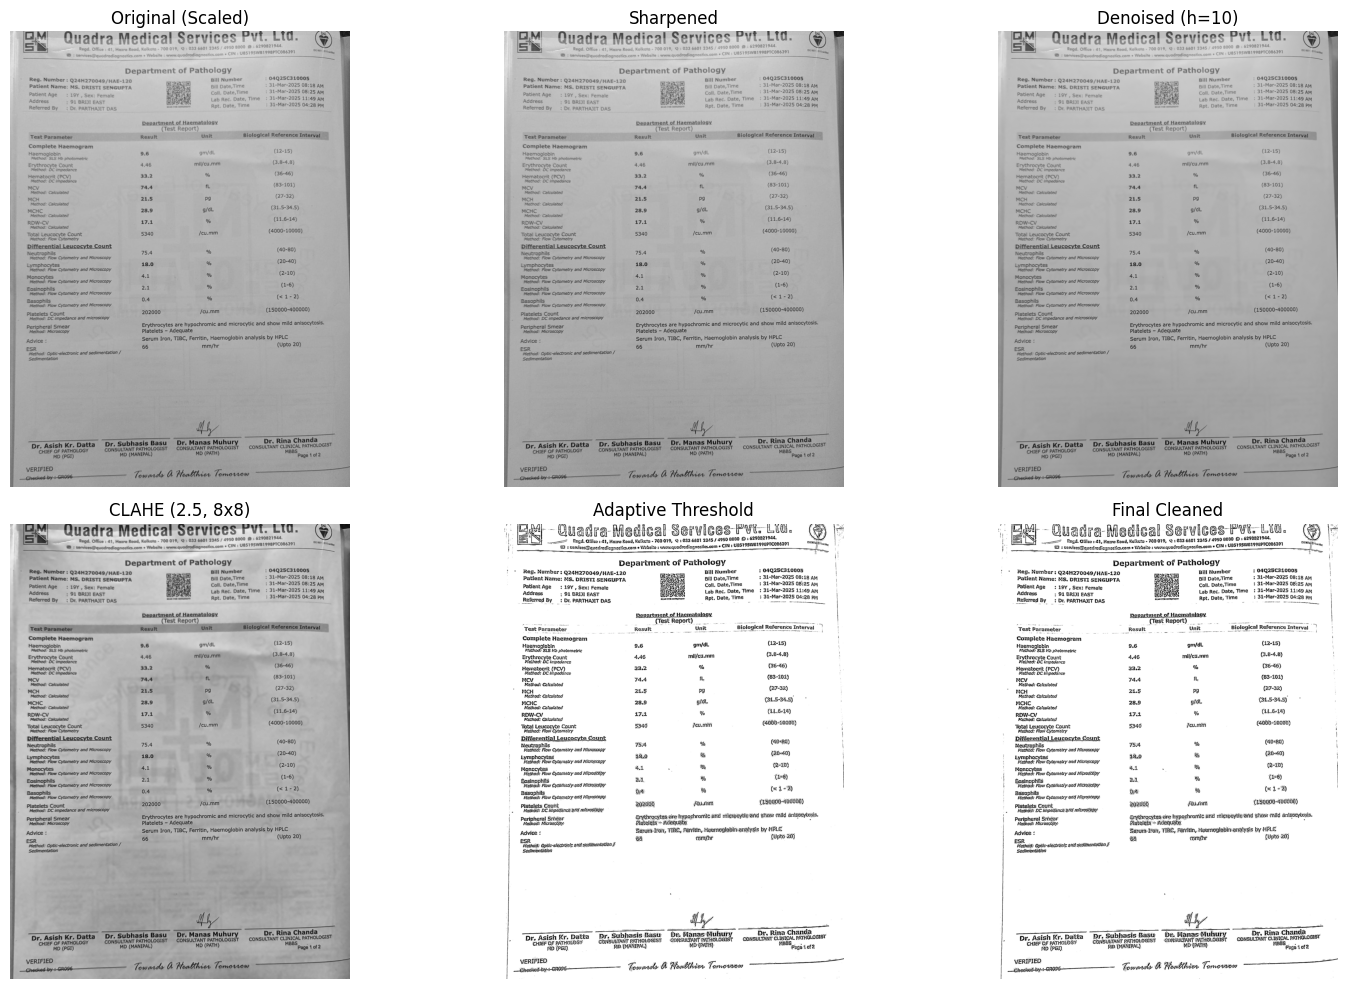

EXTRACTED TEXT:
3}

=o

Ba

bsitS

hy

{

Quadra Medical Services TVS Lot .

YD

s,

fey

eee Regd. OF: 41, Hosa Rood, Kolkuty - 700 O19,

033 6601 2345 / 4950 8000 ©: 6290821944,

ace

&2 : senites@quadsadiagnestics.com ¢ Website : wav. oudroticqnostie. com e CIN: : UBSTE

SWBIOPEPTCORES7!

co

a

Department of Pathology

Reg. Number Q24H270049/8AE-120

Bill Number

: @4Q25C310005

By

31-Mar-2025 08:18 AM

Patient Name: MS. DRISTI SENGUPTA

ey

Bill Date, Time

Patient Age

isy , Sex: Female

hag

Coll. Date, Time

: 31-Mar-2025 08:25 AM

Address

Lab Rec. Date, Time

: 31-Mar-2025 11:49 am

91 BRIJI EAST

Es

BEAR TOM STRATE

: 31-Mar-2025 04:28 PM

Referred By

: Dr, PARTHAJIT DAS

Rpt. Date, Time

-

Oe at a

tof

to

Y.

(Test Report)

_

eee

eee

Biological Reference Interval

‘Test Parameter

Result

ee

Unit

-

Coniplete Hsemogram

Haemoglobin

9.6

gm/dL

(12-45)

: SUS Hd photometric

46

mil/eu.mm

(3.8-4.8)

Erythrecyte Count

Metriod: OC tmpedance

Yo

(36-46)

Henrstoc

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

image_path = "/content/b2d2e730-ea09-4a8e-938b-f03959d2f79b.jpg_processed.jpg"
img = cv2.imread(image_path)

# Scale
scale = 2.5
img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sharpen (Laplacian - good choice)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
sharpened = np.uint8(np.clip(gray - 0.3 * laplacian, 0, 255))

# STRONGER denoising (critical for your image)
denoised = cv2.fastNlMeansDenoising(sharpened, None, h=10, templateWindowSize=7, searchWindowSize=21)

# BALANCED CLAHE - this is key
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
enhanced = clahe.apply(denoised)

# Gentler threshold
thresh = cv2.adaptiveThreshold(
    enhanced, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=4
)

# Morphological cleanup - remove small noise, connect broken characters
kernel_noise = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_noise, iterations=1)

# Strengthen thin characters slightly
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
cleaned = cv2.dilate(cleaned, kernel_dilate, iterations=1)

# Display
fig, axes = plt.subplots(2, 3, figsize=(16,10))

axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original (Scaled)")
axes[0, 0].axis('off')

axes[0, 1].imshow(sharpened, cmap='gray')
axes[0, 1].set_title("Sharpened")
axes[0, 1].axis('off')

axes[0, 2].imshow(denoised, cmap='gray')
axes[0, 2].set_title("Denoised (h=10)")
axes[0, 2].axis('off')

axes[1, 0].imshow(enhanced, cmap='gray')
axes[1, 0].set_title("CLAHE (2.5, 8x8)")
axes[1, 0].axis('off')

axes[1, 1].imshow(thresh, cmap='gray')
axes[1, 1].set_title("Adaptive Threshold")
axes[1, 1].axis('off')

axes[1, 2].imshow(cleaned, cmap='gray')
axes[1, 2].set_title("Final Cleaned")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# OCR
custom_config = r'--oem 3 --psm 11'
text = pytesseract.image_to_string(cleaned, config=custom_config)
print("=" * 60)
print("EXTRACTED TEXT:")
print("=" * 60)
print(text)

Rotation correction: 0.00°


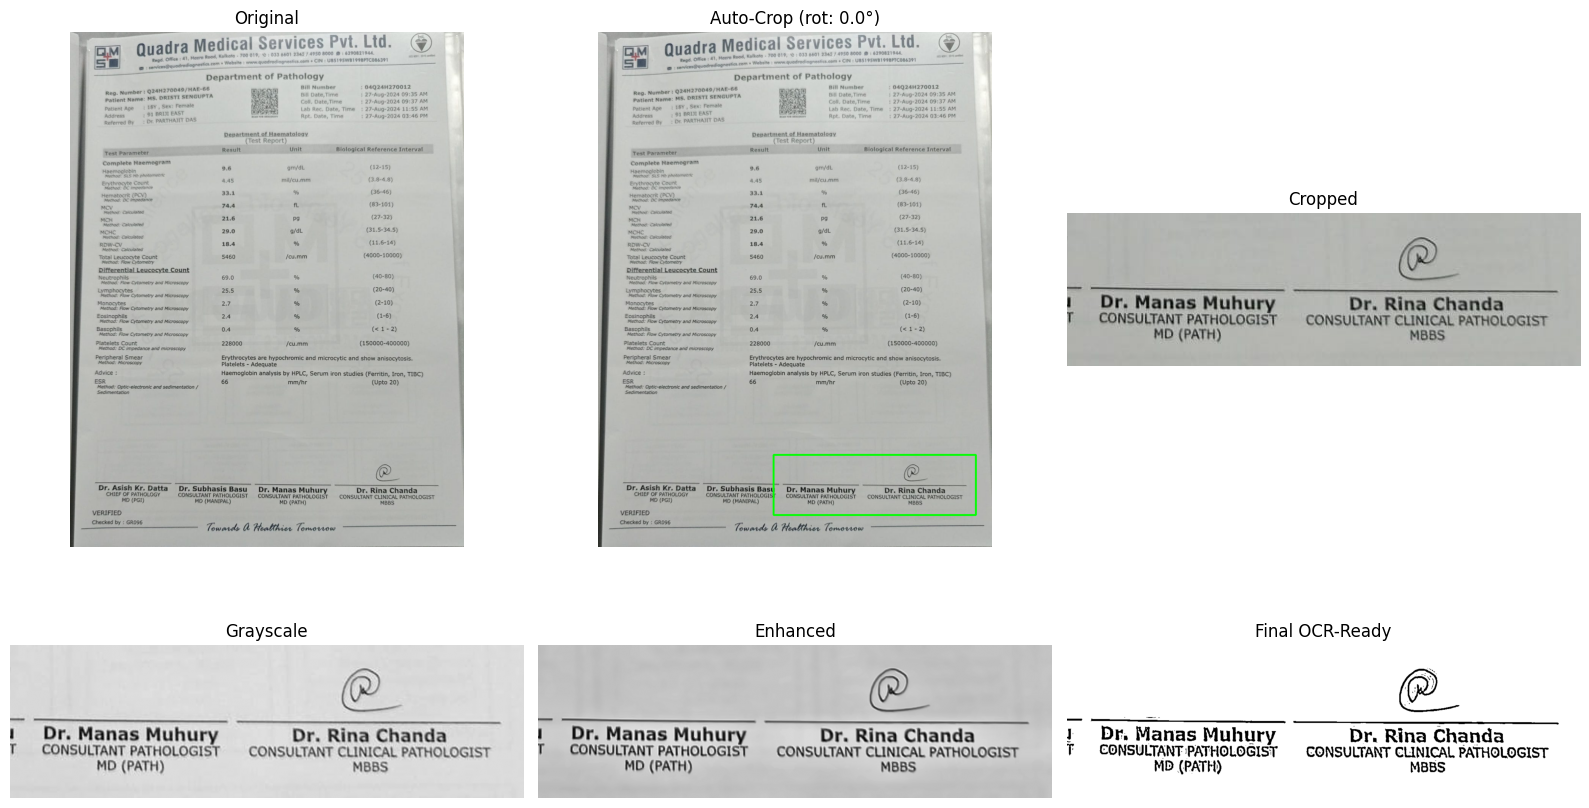


EXTRACTED TEXT:
} Dr. Manas Muhury Dr. Rina Chanda
F  CONSULTANT:PATHOLOGIST | CONSULTANT CLINICAL PATHOLOGIST
MD (PATH) MBBS


HIGH CONFIDENCE (>70%):
} (77%)
Dr. (88%)
Manas (92%)
Muhury (90%)
Dr. (89%)
Rina (95%)
Chanda (96%)
F (78%)
CONSULTANT (88%)
CLINICAL (96%)
PATHOLOGIST (96%)
MD (95%)
(PATH) (95%)
MBBS (96%)


In [ ]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

def auto_deskew_and_crop(img, visualize=False):
    """Auto-rotate and crop document"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

    # Detect rotation via Hough lines
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    angle = 0
    if lines is not None:
        angles = [np.degrees(np.arctan2(line[0][3] - line[0][1], line[0][2] - line[0][0])) for line in lines]
        angles = [a for a in angles if abs(a) < 45]
        if angles:
            angle = np.median(angles)

    # Rotate
    if abs(angle) > 0.5:
        h, w = img.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
        img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

    # Find document contour
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated = cv2.dilate(edged, kernel, iterations=2)

    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest)

        # Add margin
        margin = 20
        x = max(0, x - margin)
        y = max(0, y - margin)
        w = min(img.shape[1] - x, w + 2*margin)
        h = min(img.shape[0] - y, h + 2*margin)

        cropped = img[y:y+h, x:x+w]

        if visualize:
            viz = img.copy()
            cv2.rectangle(viz, (x, y), (x+w, y+h), (0, 255, 0), 3)
            return cropped, angle, viz
        return cropped, angle

    return img, angle

def preprocess_for_ocr(img):
    """Enhanced preprocessing pipeline"""
    # Scale
    scale = 2.5
    img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sharpen
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpened = np.uint8(np.clip(gray - 0.3 * laplacian, 0, 255))

    # Denoise
    denoised = cv2.fastNlMeansDenoising(sharpened, None, h=10, templateWindowSize=7, searchWindowSize=21)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=1.1, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)

    # Threshold
    thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, blockSize=11, C=4)

    # Morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    kernel_d = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    cleaned = cv2.dilate(cleaned, kernel_d, iterations=1)

    return cleaned, enhanced, gray

def extract_text(img, config=r'--oem 3 --psm 6'):
    """OCR extraction"""
    text = pytesseract.image_to_string(img, config=config)
    data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT, config=config)
    return text, data

# Main pipeline
image_path = "/content/3fe6bf24-161c-406b-8463-063003a72c36.jpg"
img = cv2.imread(image_path)

# Step 1: Auto crop and rotate
cropped, angle, viz = auto_deskew_and_crop(img, visualize=True)
print(f"Rotation correction: {angle:.2f}°")

# Step 2: Preprocess
final, enhanced, gray = preprocess_for_ocr(cropped)

# Step 3: Extract text
text, data = extract_text(final)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(viz, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title(f"Auto-Crop (rot: {angle:.1f}°)")
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title("Cropped")
axes[0, 2].axis('off')

axes[1, 0].imshow(gray, cmap='gray')
axes[1, 0].set_title("Grayscale")
axes[1, 0].axis('off')

axes[1, 1].imshow(enhanced, cmap='gray')
axes[1, 1].set_title("Enhanced")
axes[1, 1].axis('off')

axes[1, 2].imshow(final, cmap='gray')
axes[1, 2].set_title("Final OCR-Ready")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Print results
print("\n" + "="*60)
print("EXTRACTED TEXT:")
print("="*60)
print(text)

print("\n" + "="*60)
print("HIGH CONFIDENCE (>70%):")
print("="*60)
for i, conf in enumerate(data['conf']):
    if int(conf) > 70 and data['text'][i].strip():
        print(f"{data['text'][i]} ({conf}%)")

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

image_path = "/content/croped_test_1.jpg"
img = cv2.imread(image_path)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def display(im_data):
    dpi = 20

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
def extract_text(img, config=r'--oem 3 --psm 11'):
    """OCR extraction"""
    text = pytesseract.image_to_string(img, config=config)
    return text
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=2)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=2)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return (image)
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=2)
    image = cv2.bitwise_not(image)
    return (image)
thresh = cv2.adaptiveThreshold(gray_img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, blockSize=15, C=7)
display(thresh)


img_noise_removal = noise_removal(thresh)
display(img_noise_removal)
# eroded = thin_font(img_noise_removal)
# display(eroded)
dilated = thick_font(img_noise_removal)
display(dilated)
print(extract_text(dilated))

ModuleNotFoundError: No module named 'pytesseract'